In [1]:
#import some necessary librairies

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp

import scipy.special as special
import scipy.stats as stats

In [2]:
df = pd.read_csv("airquality.csv")
df = df.dropna()

In [34]:
df['index'] = df.index
df = df.rename(columns={'Solar.R':'SolarR',})
print(df.shape)
df.head(111)

(111, 7)


,Ozone,SolarR,Wind,Temp,Month,Day,index
0,41.0,190.0,7.4,67,5,1,0
1,36.0,118.0,8.0,72,5,2,1
2,12.0,149.0,12.6,74,5,3,2
3,18.0,313.0,11.5,62,5,4,3
6,23.0,299.0,8.6,65,5,7,6
7,19.0,99.0,13.8,59,5,8,7
8,8.0,19.0,20.1,61,5,9,8
11,16.0,256.0,9.7,69,5,12,11
12,11.0,290.0,9.2,66,5,13,12
13,14.0,274.0,10.9,68,5,14,13


# airqualityの各量をデータ順にプロットせよ。
- この時、各量を重ねて描くこと。スケーリング等を工夫して見やすいように表示すること。  
- 次に、airqualityの各量の相関行列とそれを図示したものを描け。
- これらからまず何が言えそうか。​

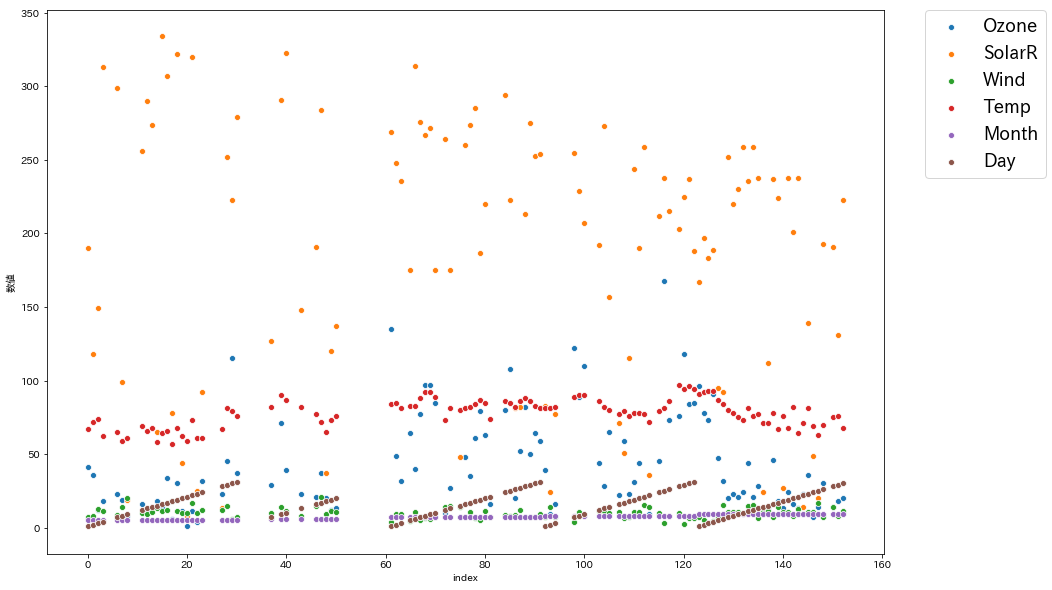

In [4]:
plt.figure(figsize=(15,10))
for i in range(6):
    column_name = df.columns[i]
    sns.scatterplot(x="index", y=column_name, data=df, label=column_name)
plt.ylabel("数値")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)#判例位置調整

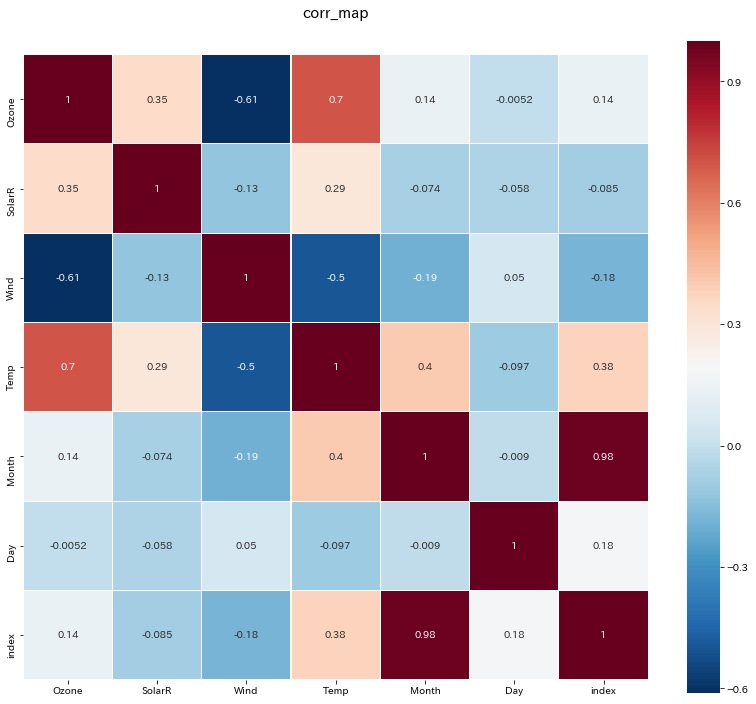

In [5]:
corr_mat = df.corr(method='pearson')

colormap = plt.cm.RdBu_r #color map read

plt.figure(figsize=(14,12))
plt.title('corr_map', y=1.05, size=15)
sns.heatmap(corr_mat,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

- Ozone と wind
- Ozone と Temp
- Temp と wind
- Month と index  
の相関係数が|0.5|以上

# オゾン量のヒストグラムを作成せよ
オゾン量のばらつき分布がガンマ分布に従うとした場合のガンマ分布のパラメータを最尤推定し、上記ヒストグラムと重ねて作図せよ。推定には、Rではfitdistr関数を用いるとよい


In [6]:
import scipy as sp

import scipy.special as special
import scipy.stats as stats

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


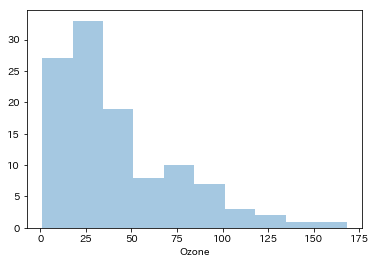

In [7]:
sns.distplot(df.Ozone,kde = False)

a_hat: 1.6151303215469714, loc_hat: 0.4984666231628183, scale_hat: 25.7568519509869


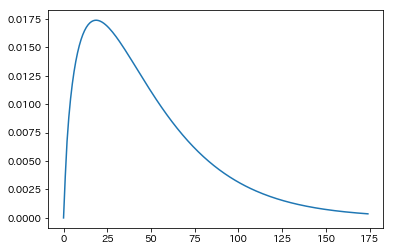

In [8]:
#参考https://www.hiromasa.info/posts/10/

# fittingを実行
# 最尤推定した形状パラメータ(a), 位置パラメータ, スケールパラメータ(b)を返す


data = df.Ozone
a_hat, loc_hat, scale_hat = stats.gamma.fit(data)

xs = np.linspace(stats.gamma.ppf(0.0001, a_hat, scale=scale_hat),
                           stats.gamma.ppf(0.99, a_hat, scale=scale_hat), 175)

ps_hat = stats.gamma.pdf(xs, a_hat, loc=loc_hat, scale=scale_hat)
print("a_hat: {0}, loc_hat: {1}, scale_hat: {2}".format(a_hat, loc_hat, scale_hat))
plt.plot(ps_hat)

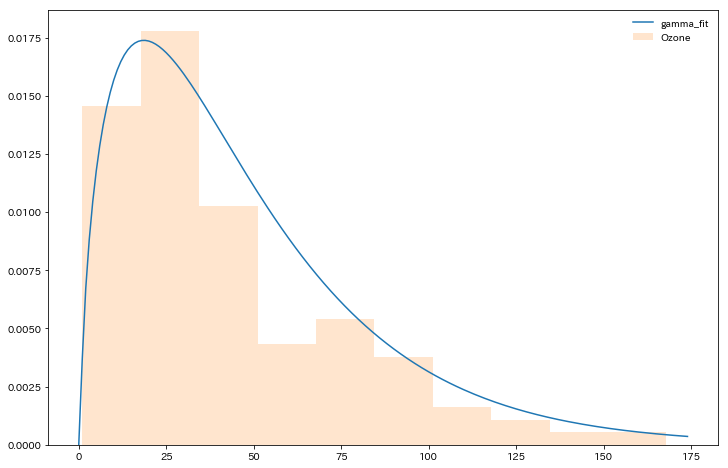

In [9]:
# 確率分布およびヒストグラムをプロット
fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(ps_hat, label='gamma_fit')
ax.hist(data, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

#  (ホールドアウト検証)​
今、airqualityのオブザベーションの111個の内、31個のobservationを評価用に取り除く。​
これは、set.seed(99997); ival=sample(c(1:111),11,replace=F)として、そのインディックスを求めること。​
残りのオブザーベーションに対して、オゾン量を目的変数とし、説明変数としては、残りの5つの量を「取り入れる、取り入れない」の計2^5=32通りについて、glmで予測モデルを求めよ。ここで、確率分布はガンマ分布、リンク関数は対数リンク関数、線形予測子としては、各説明変数を1次まで用いることとする。この各モデルのAICを求めよ。どのモデルが最もよいのか?​

set.seed(9997)ではどうか?​


In [10]:
#データ分割
import random
seed = 99997
ival = df.sample(n=31, random_state=seed, replace=False)
index_data = ival['index']
ival.head()

,Ozone,SolarR,Wind,Temp,Month,Day,index
87,52.0,82.0,12.0,86,7,27,87
67,77.0,276.0,5.1,88,7,7,67
20,1.0,8.0,9.7,59,5,21,20
147,14.0,20.0,16.6,63,9,25,147
133,44.0,236.0,14.9,81,9,11,133


In [11]:
#評価データ作成
x_test = pd.DataFrame()
for i in index_data.values:
    x_test = x_test.append(df[df['index'] == i])

test = x_test.drop('index',axis=1) #目的変数+説明変数
y_test = x_test['Ozone'] # 目的変数のみ
x_test = x_test.drop('index',axis=1)
x_test.drop(['Ozone'], axis=1, inplace=True)# 説明変数のみ

In [12]:
#学習データ作成
x_train = df.copy()
for i in index_data.values:
    x_train = x_train.drop(i)

train = x_train.drop('index',axis=1)#目的変数+説明変数
y_train = x_train['Ozone']# 目的変数のみ
x_train = x_train.drop('index',axis=1)
x_train.drop(['Ozone'], axis=1, inplace=True)# 説明変数のみ

In [13]:
print("x_train: {0}, y_train: {1}, x_test: {2}, y_test: {3}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train: (80, 5), y_train: (80,), x_test: (31, 5), y_test: (31,)


### smf.glmを使った場合

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [15]:
x_names = ['SolarR ',' Wind ',' Temp ',' Month ',' Day']

create_formula = []

#1変数の場合
for x_name in x_names:
    create_formula.append('Ozone ~ ' + x_name) 

#2変数の場合
#SolarR固定
for x_name in x_names[1:]:
    create_formula.append('Ozone ~ SolarR + ' + x_name) 

#Wind 固定
for x_name in x_names[2:]:
    create_formula.append('Ozone ~ Wind + ' + x_name) 
    
#Temp 固定
for x_name in x_names[3:]:
    create_formula.append('Ozone ~ Temp + ' + x_name) 

create_formula.append('Ozone ~ Month + Day') 

#3変数
for x_name in x_names[2:]:
    create_formula.append('Ozone ~ SolarR + Wind + ' + x_name)

for x_name in x_names[3:]:
    create_formula.append('Ozone ~ SolarR + Temp + ' + x_name)

create_formula.append('Ozone ~ SolarR + Temp + Day')

for x_name in x_names[3:]:
    create_formula.append('Ozone ~ Wind + Temp + ' + x_name)

create_formula.append('Ozone ~ Temp + Month + Day')
create_formula.append('Ozone ~ Wind + Month + Day')

#4変数
create_formula.append('Ozone ~ SolarR + Wind + Temp + Month')
create_formula.append('Ozone ~ SolarR + Wind + Temp + Day')
create_formula.append('Ozone ~ SolarR + Wind + Month + Day')
create_formula.append('Ozone ~ SolarR + Temp + Month + Day')
create_formula.append('Ozone ~ Wind + Temp + Month + Day')

#5変数
create_formula.append('Ozone ~ SolarR + Wind + Temp + Month + Day')


In [30]:
#すこし参考　https://ysk24ok.github.io/2017/09/12/log_level_regression.html

#モデル作成
results = []
models = []
for i in range(len(create_formula)):
    models.append(smf.glm(formula=create_formula[i],data=train, family=sm.families.Gamma(link=sm.families.links.log)))
    results.append(models[i].fit())
# 結果
results[30].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Ozone   No. Observations:                   80
Model:                            GLM   Df Residuals:                       74
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                         0.22018
Method:                          IRLS   Log-Likelihood:                -321.89
Date:                Fri, 28 Jun 2019   Deviance:                       15.606
Time:                        09:48:02   Pearson chi2:                     16.3
No. Iterations:                    19   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5183      0.649      2.340      0.019       0.247       2.790
SolarR         0.0023      0.001      3.727      0.000       0.001       0.003
Wind          -0.0903      0.017     -5.192      0.000      -0.124      -0.056
Temp           0.0379      0.007      5.237      0.000       0.024       0.052
Month         -0.0910      0.039     -2.308      0.021      -0.168      -0.014
Day            0.0102      0.006      1.678      0.093      -0.002       0.022
==============================================================================
"""

In [17]:
#予測と評価
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
result_df = pd.DataFrame()
predict = []
RMSE = []
R2 = []

#結果作成
for i in range(len(create_formula)):
    print(create_formula[i],':',results[i].aic)
    
    predict.append(results[i].predict(x_test))
    RMSE.append(np.sqrt(mean_squared_error(y_test, predict[i])))
    R2.append(r2_score(y_test, predict[i]))
    
    #結果をresult_dfにまとめる
    tmp_se = pd.Series( [ create_formula[i],results[i].aic,RMSE[i],R2[i]], index=['formula','AIC','RMSE','R2'] )
    result_df = result_df.append( tmp_se, ignore_index=True )

Ozone ~ SolarR  : 728.8879925824572
Ozone ~  Wind  : 700.8119454405775
Ozone ~  Temp  : 693.2102244258207
Ozone ~  Month  : 742.2515037537662
Ozone ~  Day : 741.6706615143362
Ozone ~ SolarR +  Wind  : 678.1899357383206
Ozone ~ SolarR +  Temp  : 687.4265554252936
Ozone ~ SolarR +  Month  : 727.7032868128699
Ozone ~ SolarR +  Day : 729.1736402110614
Ozone ~ Wind +  Temp  : 673.3086316483489
Ozone ~ Wind +  Month  : 702.3620580876532
Ozone ~ Wind +  Day : 700.8786004090158
Ozone ~ Temp +  Month  : 691.1908632776313
Ozone ~ Temp +  Day : 692.8004216077545
Ozone ~ Month + Day : 742.0920563981396
Ozone ~ SolarR + Wind +  Temp  : 660.5923193720296
Ozone ~ SolarR + Wind +  Month  : 680.1989123521244
Ozone ~ SolarR + Wind +  Day : 678.3582756607796
Ozone ~ SolarR + Temp +  Month  : 686.7665687521396
Ozone ~ SolarR + Temp +  Day : 686.6811515277211
Ozone ~ SolarR + Temp + Day : 686.6811515277211
Ozone ~ Wind + Temp +  Month  : 668.1198268186877
Ozone ~ Wind + Temp +  Day : 672.7185775035003
Ozon

In [18]:
#csv出力
result_df.head()
result_df.to_csv('result_df.csv')

<BarContainer object of 31 artists>

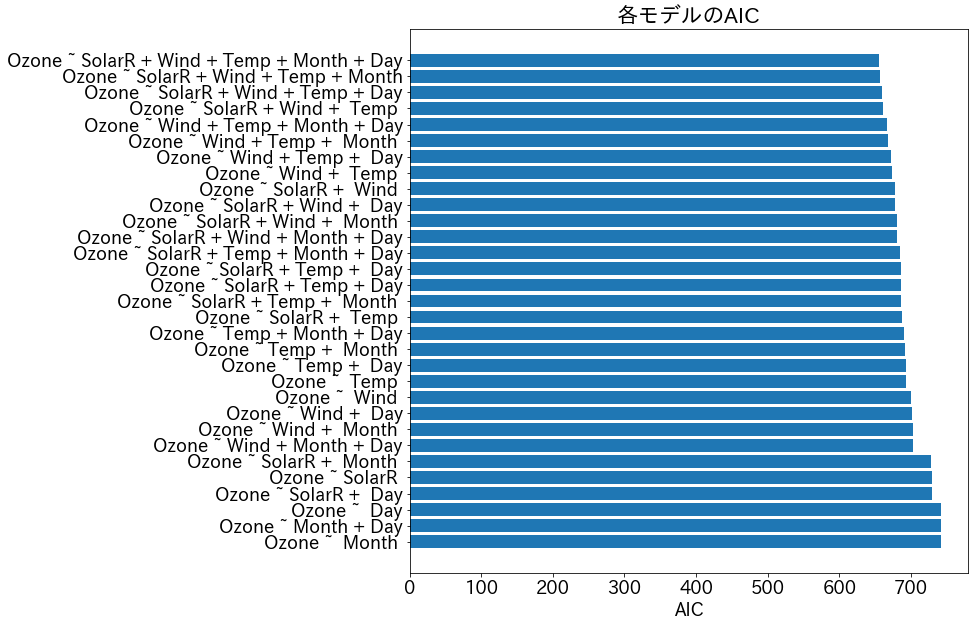

In [35]:
result_df = result_df.sort_values(by=['AIC'], ascending=False)

plt.figure(figsize=(10, 10))
plt.title('各モデルのAIC')
plt.xlabel("AIC")
plt.rcParams["font.size"] = 18
plt.barh(result_df['formula'], result_df['AIC'])

<BarContainer object of 31 artists>

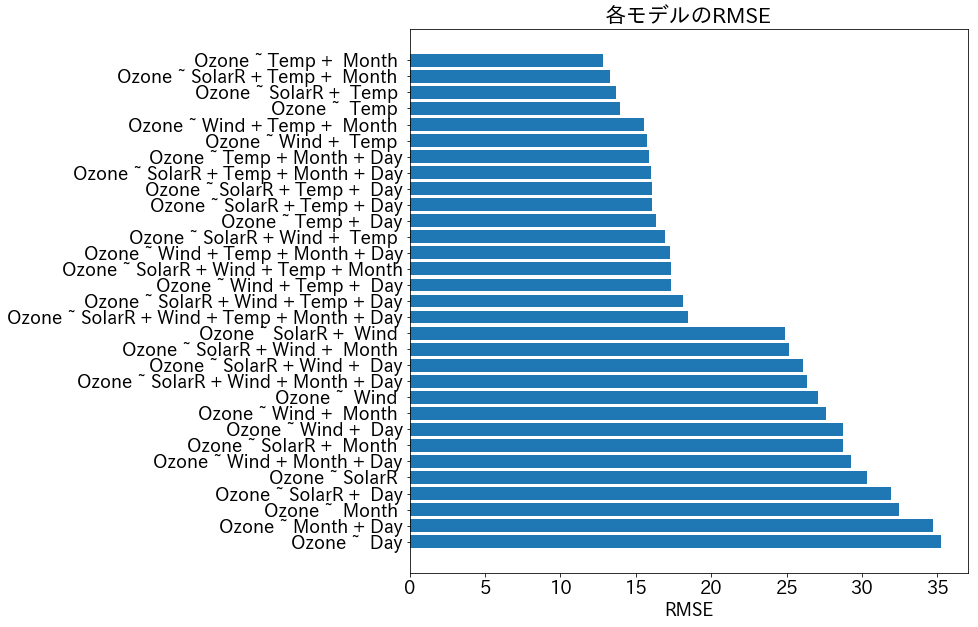

In [20]:
result_df = result_df.sort_values(by=['RMSE'], ascending=False)

plt.figure(figsize=(10, 10))
plt.title('各モデルのRMSE')
plt.xlabel("RMSE")
plt.rcParams["font.size"] = 18
plt.barh(result_df['formula'], result_df['RMSE'])

<BarContainer object of 31 artists>

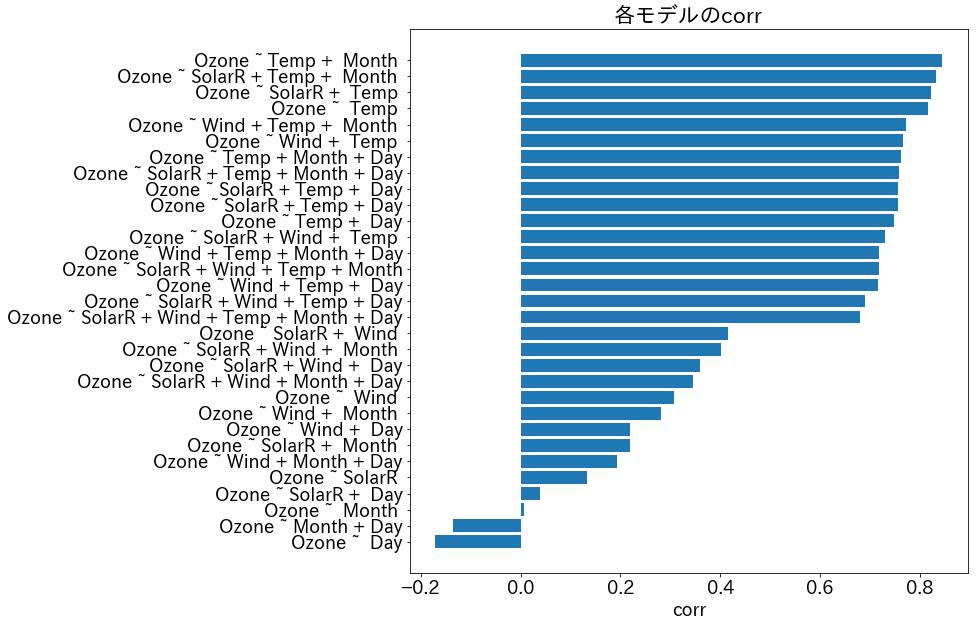

In [21]:
result_df = result_df.sort_values(by=['R2'], ascending=True)

plt.figure(figsize=(10, 10))
plt.title('各モデルのcorr')
plt.xlabel("corr")
plt.rcParams["font.size"] = 18
plt.barh(result_df['formula'], result_df['R2'])

(0, 100)

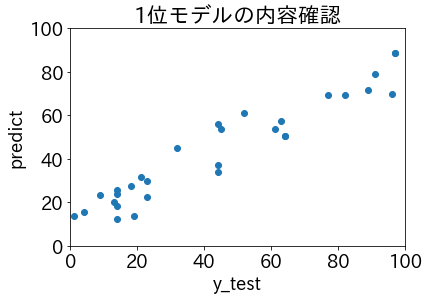

In [22]:
plt.scatter(y_test, predict[12])
plt.title('1位モデルの内容確認')
plt.xlabel("y_test")
plt.ylabel("predict")
plt.xlim(0,100)
plt.ylim(0,100)

(0, 100)

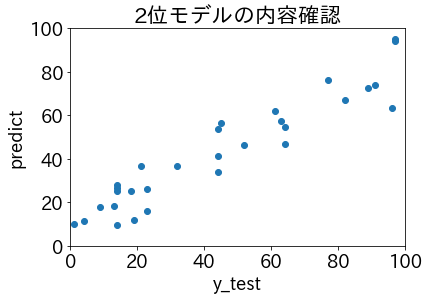

In [23]:
plt.scatter(y_test, predict[18])
plt.title('2位モデルの内容確認')
plt.xlabel("y_test")
plt.ylabel("predict")
plt.xlim(0,100)
plt.ylim(0,100)

(0, 100)

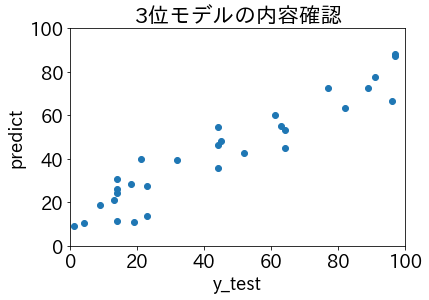

In [24]:
plt.scatter(y_test, predict[6])
plt.title('3位モデルの内容確認')
plt.xlabel("y_test")
plt.ylabel("predict")
plt.xlim(0,100)
plt.ylim(0,100)

# Solar.R の二次項を加えたモデルではどうか?​

glmにおいて、formula=Ozone~ Solar.R+I(Solar.R^2)+Wind+Temp+Month​
のように指定するだけでよい。

In [25]:
kadai_formula = 'Ozone ~ SolarR + I(SolarR ** 2) + Wind + Temp + Month'
model = smf.glm(formula=kadai_formula,data=train, family=sm.families.Gamma(link=sm.families.links.log))
result = model.fit()

AIC_ = result.aic
predict_ = result.predict(x_test)
RMSE_ = np.sqrt(mean_squared_error(y_test, predict_))
R2_ = r2_score(y_test, predict_)

print("課題(4) score AIC: {0}, RMSE: {1}, R2: {2}".format(result_df.loc[12,'AIC'], result_df.loc[12,'RMSE'], result_df.loc[12,'R2']))
print("課題(5) score AIC_: {0}, RMSE_: {1}, R2_: {2}".format(AIC_, RMSE_, R2_))

課題(4) score AIC: 691.1908632776313, RMSE: 12.809909543734449, R2: 0.8452395147578196
課題(5) score AIC_: 656.9343462069489, RMSE_: 15.929575749104004, R2_: 0.7606814429787634


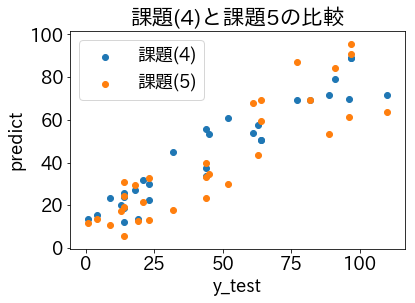

In [26]:
plt.scatter(y_test, predict[12],label='課題(4)')
plt.scatter(y_test, predict_,label='課題(5)')
plt.title('課題(4)と課題5の比較')
plt.xlabel("y_test")
plt.ylabel("predict")
plt.legend(loc='upper left')